# Import Required Libraries
Import the necessary libraries, including pandas, scikit-learn, and joblib.

In [19]:
# Import Required Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load Dataset
Load the Chronic Kidney Disease Dataset using pandas.

In [20]:
# Load Dataset
df = pd.read_csv(r"Chronic Kidney Disease Dataset.csv")  # Load the dataset into a DataFrame
df.head()  # Display the first few rows of the dataset

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [21]:
# Drop the 'id' column if it exists
if 'id' in df.columns:
    df.drop(columns=['id'], inplace=True)

df.head()  # Display the first few rows of the dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd


# Preprocess Data
Handle missing values, encode categorical variables, and normalize numerical features.

In [22]:
# Preprocess Data

# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill missing numerical values with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill missing categorical values with mode

# Encode categorical variables using Label Encoding
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Normalize numerical features
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Check the column names to find the correct target column name
print(df.columns)
print(df.head())

target_column = "classification"  # Update this to the correct target column name

# Split the data into features and target
X = df.drop(target_column, axis=1)
y = df[target_column]

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')
        age        bp        sg        al        su  rbc  pc  pcc  ba  \
0 -0.210031  0.254214  0.421486  0.076249 -0.380269    1   1    0   0   
1 -2.627234 -1.972476  0.421486  2.363728 -0.380269    1   1    0   0   
2  0.615355  0.254214 -1.421074  0.838742  2.507853    1   1    0   0   
3 -0.210031 -0.488016 -2.342354  2.363728 -0.380269    1   0    1   0   
4 -0.033163  0.254214 -1.421074  0.838742 -0.380269    1   1    0   0   

        bgr  ...  pcv  wc  rc  htn  dm  cad  appet  pe  ane  classification  
0 -0.320122  ...   32  72  34    1   4    1      0   0    0               0  
1 -0.320122  ...   26  56  34    0   3    1      0   0    0               0  
2  3.697618  ...   19  70  34    0   4    1      1   0    1               0  
3 -0.373337  ...   20  62  1

# Correlation Matrix
Visualize the correlation matrix using a heatmap, Drop columns with low correlation to the target variable

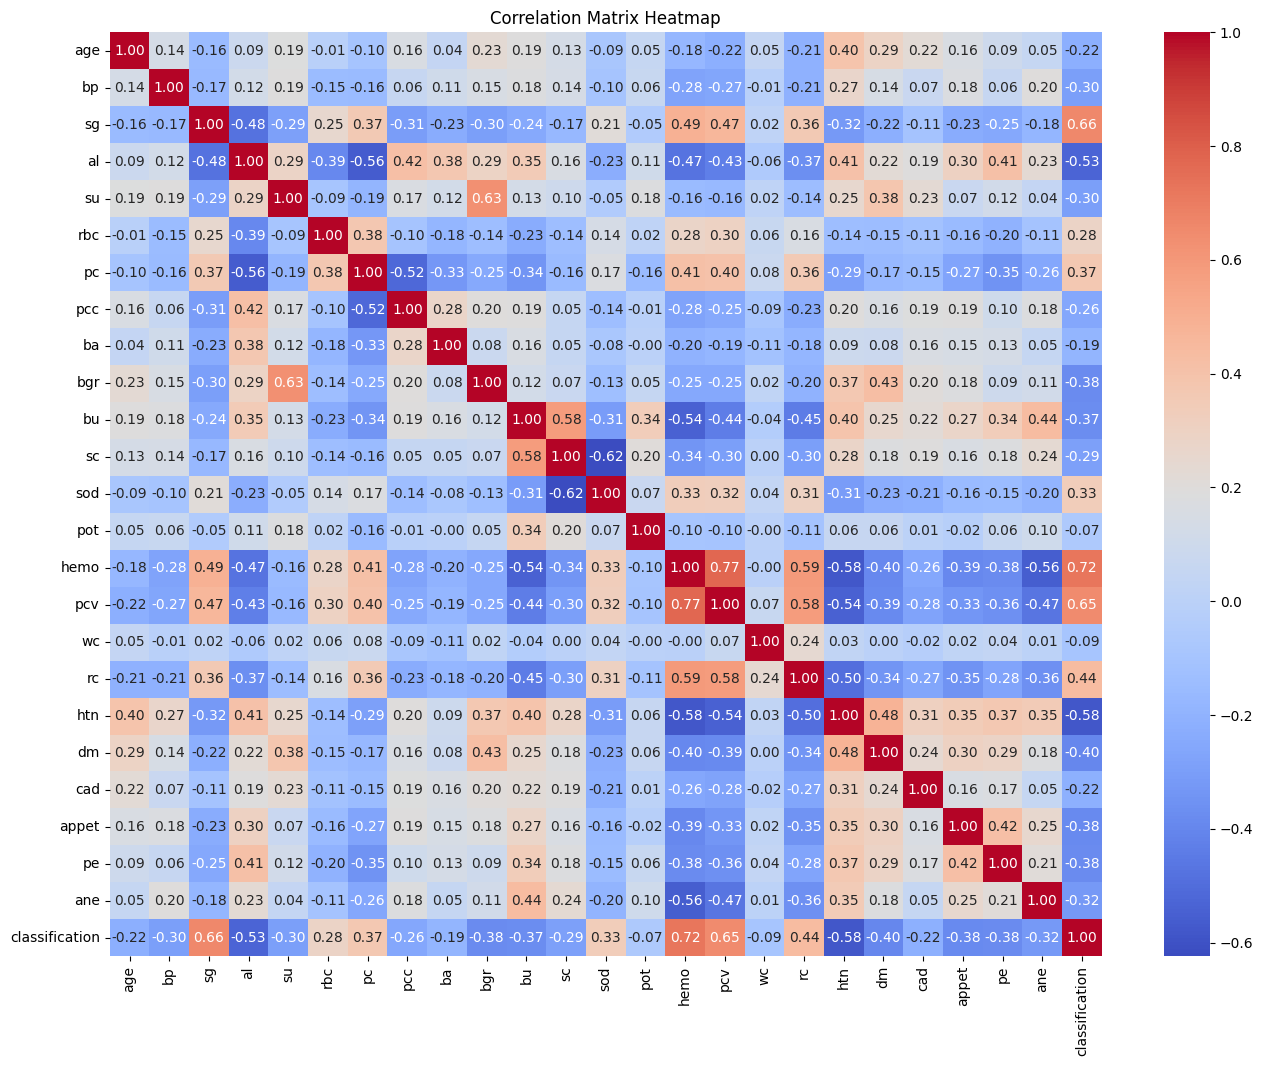

Correlation with target variable:
classification    1.000000
hemo              0.724742
sg                0.657810
pcv               0.648461
htn               0.584451
al                0.531885
rc                0.439458
dm                0.395778
appet             0.383689
bgr               0.378495
pe                0.378165
pc                0.371574
bu                0.371536
sod               0.334153
ane               0.320766
su                0.296919
bp                0.296613
sc                0.292050
rbc               0.284911
pcc               0.259008
age               0.222985
cad               0.216040
ba                0.188370
wc                0.092365
pot               0.065448
Name: classification, dtype: float64
Relevant features:
['hemo', 'sg', 'pcv', 'htn']


In [23]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# Get the correlation of each feature with the target variable
correlation_with_target = correlation_matrix[target_column].abs().sort_values(ascending=False)

# Display the correlation with the target variable
print("Correlation with target variable:")
print(correlation_with_target)

# Drop columns with low correlation to the target variable
threshold = 0.55
relevant_features = correlation_with_target[correlation_with_target > threshold].index.tolist()

# Keep only the relevant features
df_relevant = df[relevant_features]

# Split the data into features and target
X_relevant = df_relevant.drop(target_column, axis=1)
y_relevant = df_relevant[target_column]

# Display the relevant features
print("Relevant features:")
print(X_relevant.columns.tolist())

# Split Dataset into Training and Testing Sets
Use train_test_split from scikit-learn to split the dataset into training and testing sets.

In [24]:
# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X_relevant, y_relevant, test_size=0.2, random_state=42)

# Train Random Forest Model
Train a Random Forest model using the training set.

In [25]:
# Train Random Forest Model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Evaluate Model Accuracy
Evaluate the model's accuracy using the testing set and print the accuracy score.

In [26]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluate Model Accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy:.2f}')
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1 Score: 1.00


# Save the Model
Save the trained model to a folder using joblib.

In [27]:
# Save the Model
import os

# Create a directory to save the model if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the model
joblib.dump(rf_model, 'models/Chronic Kidney Disease Prediction.pkl')

# Display the columns used for training the model
print("Columns used for training the model:")
print(X_train.columns.tolist())

# Display the number of parameters needed for the prediction
print(f'Number of parameters needed for the prediction: {X_train.shape[1]}')

Columns used for training the model:
['hemo', 'sg', 'pcv', 'htn']
Number of parameters needed for the prediction: 4
